In this notebook it will be provide examples about how the `mosqlient` package can be used to apply the ensemble methodologies proposed

In [1]:
import pandas as pd
import mosqlient as mosq
from mosqlient import get_prediction_by_id
from mosqlient.models.ensemble import get_df_pars, Ensemble,Ensemble_linear
from mosqlient.models.viz import plot_preds

Get a prediction:

In [2]:
df = get_prediction_by_id(300).to_dataframe()

df.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3
0,2024-10-06,1491.5,804.0,3347.0,BRA,SP,None,None
1,2024-10-13,1576.5,867.0,3671.0,BRA,SP,None,None
2,2024-10-20,1746.0,937.0,3755.0,BRA,SP,None,None
3,2024-10-27,1800.0,987.0,4064.0,BRA,SP,None,None
4,2024-11-03,1919.0,1045.0,4517.0,BRA,SP,None,None


Apply the log normal parametrization for the predictions:

In the cell below is used the log normal distribution minimized by the lower and upper values of the predictions. 

In [3]:
df_pars = get_df_pars(df, dist = 'log_normal', fn_loss = 'lower', return_estimations=True)

df_pars.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,1491.5,804.0,3347.0,BRA,SP,None,None,7.402709,0.433540,1640.423113,804.000001,3346.999984
1,2024-10-13,1576.5,867.0,3671.0,BRA,SP,None,None,7.486629,0.438696,1784.028310,866.999999,3671.000017
2,2024-10-20,1746.0,937.0,3755.0,BRA,SP,None,None,7.536763,0.421971,1875.749178,936.999997,3754.999988
3,2024-10-27,1800.0,987.0,4064.0,BRA,SP,None,None,7.602297,0.430206,2002.790061,987.000002,4064.000019
4,2024-11-03,1919.0,1045.0,4517.0,BRA,SP,None,None,7.683688,0.444973,2172.617094,1044.999998,4517.000043


In the cell below is used the log normal distribution minimized by the median and upper values of the predictions. 

In [4]:
df_pars = get_df_pars(df, dist = 'log_normal', fn_loss = 'median', return_estimations=True)

df_pars.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,1491.5,804.0,3347.0,BRA,SP,None,None,7.307537,0.491400,1491.499824,664.646809,3346.998281
1,2024-10-13,1576.5,867.0,3671.0,BRA,SP,None,None,7.362962,0.513880,1576.499362,677.022772,3670.999470
2,2024-10-20,1746.0,937.0,3755.0,BRA,SP,None,None,7.465083,0.465549,1745.999984,811.855561,3754.997921
3,2024-10-27,1800.0,987.0,4064.0,BRA,SP,None,None,7.495542,0.495109,1799.999531,797.243380,4064.001522
4,2024-11-03,1919.0,1045.0,4517.0,BRA,SP,None,None,7.559560,0.520438,1919.000397,815.267394,4516.999638


In the cell below is used the normal distribution minimized by the median and upper values of the predictions. 

In [5]:
df_pars = get_df_pars(df, dist = 'normal', fn_loss='median', return_estimations=True)

df_pars.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,1491.5,804.0,3347.0,BRA,SP,None,None,1491.500003,1128.063895,1491.500003,-363.999987,3346.999993
1,2024-10-13,1576.5,867.0,3671.0,BRA,SP,None,None,1576.500005,1273.365590,1576.500005,-518.000004,3671.000014
2,2024-10-20,1746.0,937.0,3755.0,BRA,SP,None,None,1745.999999,1221.385240,1745.999999,-262.999942,3754.999941
3,2024-10-27,1800.0,987.0,4064.0,BRA,SP,None,None,1800.000009,1376.414304,1800.000009,-464.000052,4064.000069
4,2024-11-03,1919.0,1045.0,4517.0,BRA,SP,None,None,1919.000014,1579.471838,1919.000014,-678.999966,4516.999995


In the cell below is used the normal distribution minimized by the lower and upper values of the predictions. 

In [6]:
df_pars = get_df_pars(df, dist = 'normal', fn_loss='lower', return_estimations=True)

df_pars.head()

,date,pred,lower,upper,adm_0,adm_1,adm_2,adm_3,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,1491.5,804.0,3347.0,BRA,SP,None,None,2075.500020,773.017125,2075.500020,803.999998,3347.000042
1,2024-10-13,1576.5,867.0,3671.0,BRA,SP,None,None,2268.999945,852.355441,2268.999945,867.000007,3670.999883
2,2024-10-20,1746.0,937.0,3755.0,BRA,SP,None,None,2346.000009,856.611166,2346.000009,937.000026,3754.999992
3,2024-10-27,1800.0,987.0,4064.0,BRA,SP,None,None,2525.499996,935.341588,2525.499996,986.999993,4063.999999
4,2024-11-03,1919.0,1045.0,4517.0,BRA,SP,None,None,2781.000033,1055.413075,2781.000033,1045.000008,4517.000058


### Comparing the Ensemble techniques

Load the predictions that will be used to generate the ensemble

In [7]:
preds = []
for id in [146, 448, 649]:

    pred_ = get_prediction_by_id(id)
    
    df_pred = pred_.to_dataframe()

    df_pred = df_pred.drop(['adm_0', 'adm_2', 'adm_3'], axis = 1)

    df_pred['model_id'] = pred_.model.id 
    
    preds.append(df_pred)

df_preds_end = pd.concat(preds)

df_preds_end.date = pd.to_datetime(df_preds_end.date)

df_preds_end.head()

,date,pred,lower,upper,adm_1,model_id
0,2023-10-08,416.0,103.0,1719.60,RJ,22
1,2023-10-15,445.0,110.0,1936.10,RJ,22
2,2023-10-22,484.5,115.0,2079.00,RJ,22
3,2023-10-29,536.5,118.0,2426.60,RJ,22
4,2023-11-05,566.0,140.0,2499.25,RJ,22


In [8]:
df_preds_end.model_id.unique()

array([22, 30, 34])

Load the data on probable cases that will be used to minimize the ensemble weights:

In [9]:
data = mosq.get_infodengue(
    disease =  "dengue",
    start_date = "2023-10-08",
    end_date = "2024-06-02", 
    uf = 'RJ')

data = data[['data_iniSE', 'casprov']].set_index('data_iniSE')
data.index = pd.to_datetime(data.index)
data = data.resample('W-SUN').sum()

data.head()

,casprov
data_iniSE,
2023-10-08,351
2023-10-15,451
2023-10-22,470
2023-10-29,519
2023-11-05,734


Plot the predictions versus the probable cases observed:

<Axes: xlabel='Date', ylabel='New cases'>

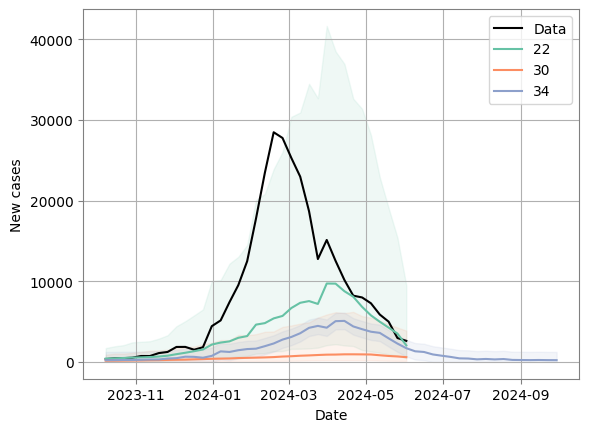

In [10]:
plot_preds(data, df_preds_end)

#### Apply the ensemble methodology

In [11]:
df_preds_end = df_preds_end.loc[df_preds_end.date <= '2024-06-02'].reset_index(drop=True)

Apply the linear mixture considering the same weights for all preds:

<Axes: xlabel='Date', ylabel='New cases'>

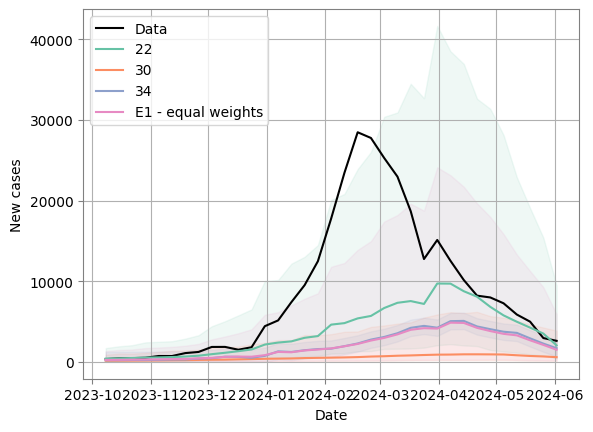

In [12]:
e1 = Ensemble_linear(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        fn_loss = 'median')

preds_e1 = e1.apply_ensemble(weights = [1/3,1/3,1/3])

preds_e1['model_id'] = 'E1 - equal weights'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimize the weigths in the ensemble 

Rename the columns of the dataset with the cases:

In [13]:
data_ens =data.reset_index().rename(columns = {'data_iniSE': 'date',
                                               'casprov':'casos'})

data_ens.head()

,date,casos
0,2023-10-08,351
1,2023-10-15,451
2,2023-10-22,470
3,2023-10-29,519
4,2023-11-05,734


Optimize the weights using the log score:

/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: Runti

<Axes: xlabel='Date', ylabel='New cases'>

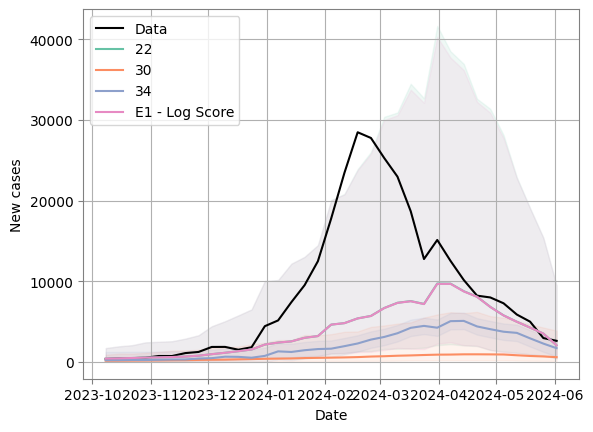

In [14]:
weights_ls = e1.compute_weights(data_ens, metric= 'log_score')

preds_e1_ls = e1.apply_ensemble(weights_ls['weights'])

preds_e1_ls['model_id'] = 'E1 - Log Score'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1_ls], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimize the weights using the CRPS:

/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: RuntimeWarning: divide by zero encountered in log
  lw = np.log(weights)  # Log of weights
/Users/eduardoaraujo/Documents/Github/mosqlimate-client/mosqlient/models/ensemble.py:623: Runti

<Axes: xlabel='Date', ylabel='New cases'>

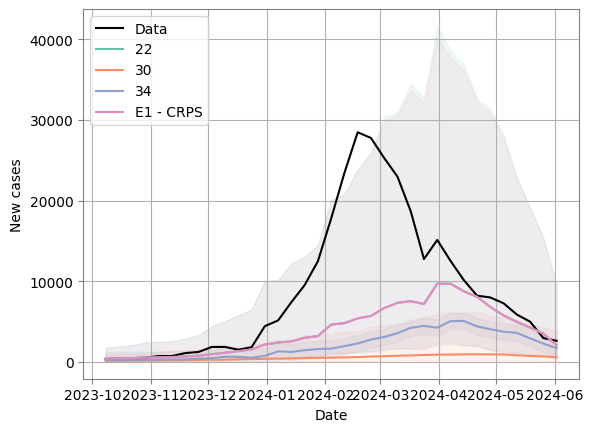

In [15]:
weights_crps = e1.compute_weights(data_ens, metric= 'crps')
preds_e1_crps = e1.apply_ensemble(weights = weights_crps['weights'])

preds_e1_crps['model_id'] = 'E1 - CRPS'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1_crps], axis = 0)

plot_preds(data, df_preds_ensemble)

Compare the ensembles outputs using the linear mixture:

<Axes: xlabel='Date', ylabel='New cases'>

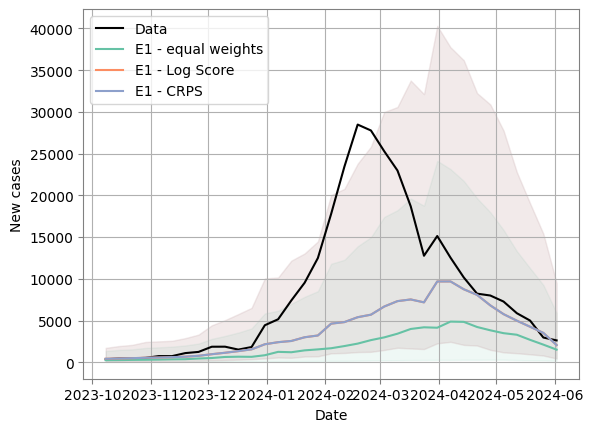

In [16]:
df_ensembles = pd.concat([preds_e1, preds_e1_ls, preds_e1_crps])

plot_preds(data, df_ensembles)

Ensembles applying the logarithmic pooling with equal weights: 

<Axes: xlabel='Date', ylabel='New cases'>

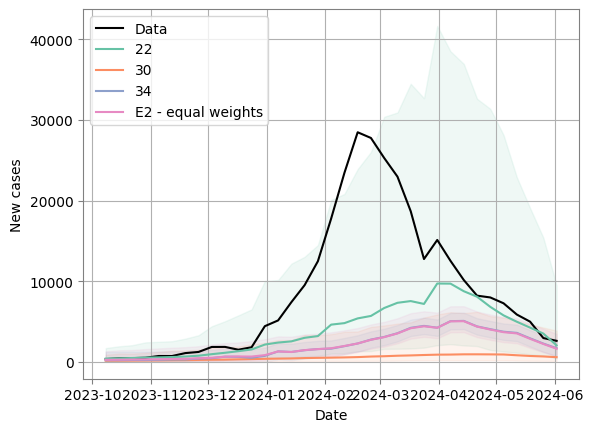

In [17]:
e2 = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        fn_loss = 'median')

preds_e2 = e2.apply_ensemble(weights = [1/3,1/3,1/3])

preds_e2['model_id'] = 'E2 - equal weights'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimizing the weights using the log score

<Axes: xlabel='Date', ylabel='New cases'>

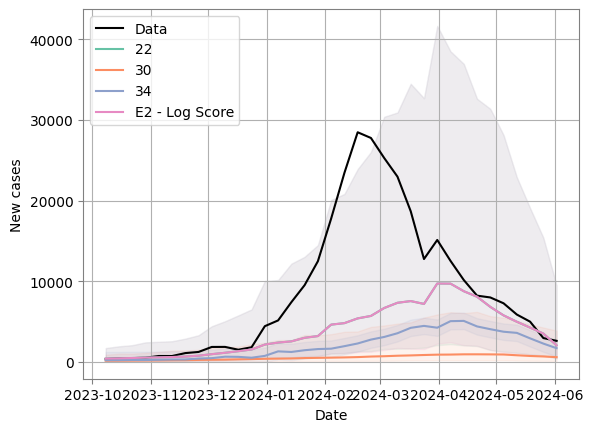

In [18]:
weights_ls = e2.compute_weights(data_ens, metric= 'log_score')

preds_e2_ls = e2.apply_ensemble(weights_ls['weights'])

preds_e2_ls['model_id'] = 'E2 - Log Score'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2_ls], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimize the weigths using the CRPS:

<Axes: xlabel='Date', ylabel='New cases'>

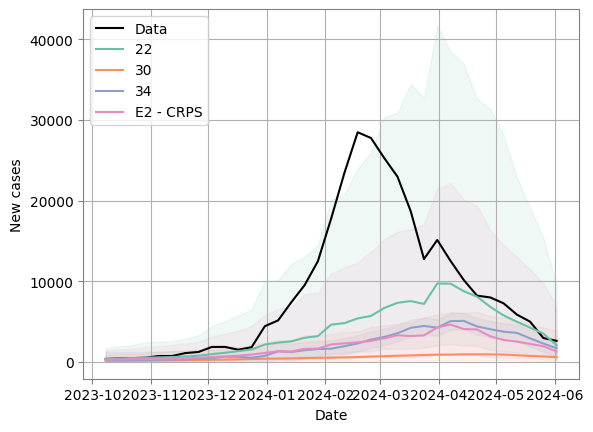

In [19]:
weights_crps = e2.compute_weights(data_ens, metric= 'crps')

preds_e2_crps = e2.apply_ensemble(weights_crps['weights'])

preds_e2_crps['model_id'] = 'E2 - CRPS'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2_crps], axis = 0)

plot_preds(data, df_preds_ensemble)

Compare the ensembles outputs using logarithmic pooling:

<Axes: xlabel='Date', ylabel='New cases'>

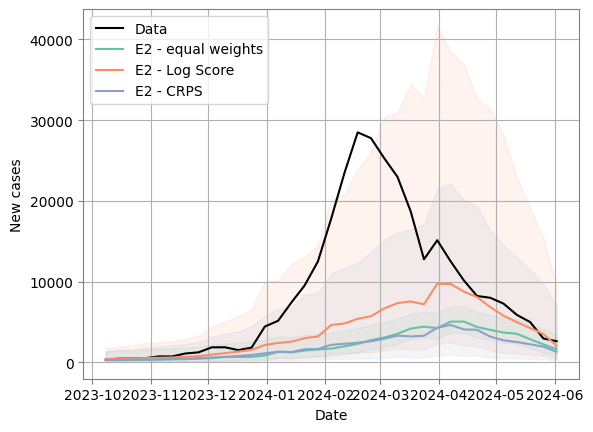

In [20]:
df_ensembles = pd.concat([preds_e2, preds_e2_ls, preds_e2_crps])

plot_preds(data, df_ensembles)

Compare the linear mixture (E1) with the logarithmic pooling (E2)

<Axes: xlabel='Date', ylabel='New cases'>

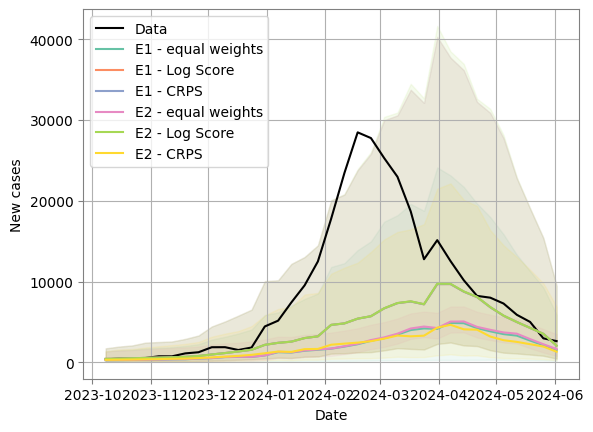

In [21]:
df_ensembles = pd.concat([preds_e1, preds_e1_ls, preds_e1_crps,
                          preds_e2, preds_e2_ls, preds_e2_crps])

plot_preds(data, df_ensembles)

Comparing the ensemble with logarithmic pooling using normal and log normal distributions: 

<Axes: xlabel='Date', ylabel='New cases'>

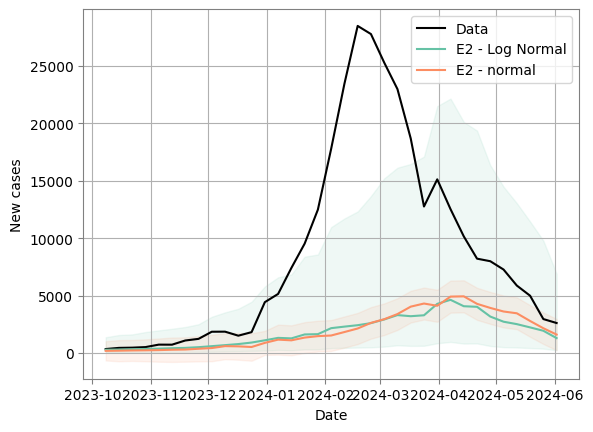

In [22]:
e2_log = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        fn_loss = 'median')

e2_log.compute_weights(data_ens, metric= 'crps')

# when is not passed weigths to apply_ensemble it used the computed using the  # `compute_weights` method 
preds_e2_log = e2_log.apply_ensemble()

preds_e2_log['model_id'] = 'E2 - Log Normal'

e2_norm = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'normal',
        fn_loss = 'median')

e2_norm.compute_weights(data_ens, metric= 'crps')

preds_e2_norm = e2_norm.apply_ensemble()

preds_e2_norm['model_id'] = 'E2 - normal'

df_ensembles = pd.concat([preds_e2_log, preds_e2_norm])

plot_preds(data, df_ensembles)
